# **LAB 2 - PART 2 Gradient Descent**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.animation import FuncAnimation
from IPython.display import display, Image
from sklearn.metrics import mean_squared_error

### **Read file, Explore Data, Data Cleansing**

In [4]:
### START CODE HERE ###
from google.colab import files
uploaded = files.upload() #Gradient-Descent-example-data.csv
df = pd.read_csv('/content/Gradient-Descent-example-data.csv', encoding = "ISO-8859-1")
df.describe()
### END CODE HERE ###

Saving Gradient-Descent-example-data.csv to Gradient-Descent-example-data.csv


,No,Gold Price Increment,Bitcoin Increment
count,9.000000,9.000000,9.000000
mean,5.000000,0.444444,1088.555556
std,2.738613,3.126944,521.563062
min,1.000000,-4.000000,424.000000
25%,3.000000,-2.000000,663.000000
50%,5.000000,1.000000,1012.000000
75%,7.000000,2.000000,1560.000000
max,9.000000,5.000000,1882.000000


### **Create a `Bitcoin Increment_standardize` columns**

In [5]:
### START CODE HERE ###
standardize_scaler = preprocessing.StandardScaler().fit(df)
df['Bitcoin Increment_standardize'] = standardize_scaler.fit_transform(df[["Bitcoin Increment"]])

### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize
0,1,-1,846,-0.493265
1,2,-4,424,-1.351452
2,3,2,1560,0.958738
3,4,-3,523,-1.150124
4,5,1,1012,-0.155685
5,6,-2,663,-0.865418
6,7,4,1624,1.088890
7,8,5,1882,1.613563
8,9,2,1263,0.354753


### **Gradient Descent**

$$
h_{\theta} = \theta_1x + \theta_0
\\
J(\theta) = (y-h{(x)})^2
\\
\theta_{j} \leftarrow \theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta)
$$
Demonstrate a single step of Gradient Descent. Then plot the graph that shows the model before and after the update parameters

Let's  $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 = 0.4, \theta_1 = 0.8, learning\ rate = 0.01$

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

![image.png](attachment:image.png)

</details>

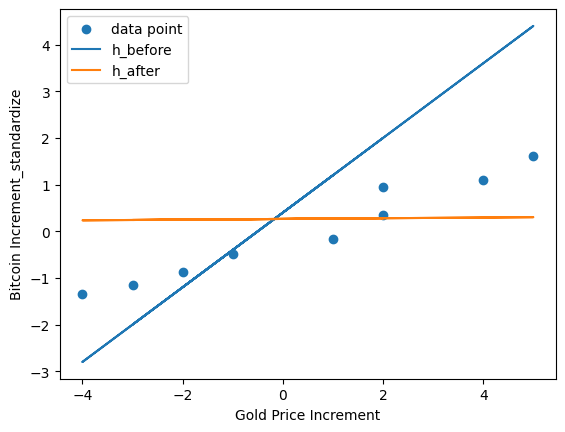

In [6]:
### START CODE HERE ###
theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01

y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']

h_before = theta_1*x + theta_0
grad_J_theta_1 = np.sum(2*(y-h_before)*(-x))
grad_J_theta_0 = np.sum(2*(y-h_before)*(-1))
theta_1 = theta_1-(alpha*grad_J_theta_1)
theta_0 = theta_0-(alpha*grad_J_theta_0)
h_after = theta_1*x + theta_0

plt.scatter(x,y,label = "data point")
plt.xlabel("Gold Price Increment")
plt.ylabel('Bitcoin Increment_standardize')
plt.plot(x, h_before, label='h_before')
plt.plot(x, h_after, label='h_after')
plt.legend()

# print(h_after)

### END CODE HERE ###

Now let's create N iterations of gradient descent, <span style='color: orange;'>***print all parameters and loss every iteration***</span> then <span style='color: orange;'>***plot the loss history***</span> and <span style='color: orange;'>***save the animation to show the change of model in each iteration to .gif***</span>.

Let's  $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 \in [0,1], \theta_1 \in [0,1], learning\ rate = alpha$


In [9]:
### START CODE HERE ###
def gradient_descent(theta_0, theta_1, iterations, x, y, alpha=0.01):
    theta_history = []
    loss_history = []

    for i in range(iterations):
        h = theta_1 * x + theta_0
        # print("h",h)
        # print("y:",y)
        error = y - h
        # print("error:", error)
        # Vectorized gradient calculations
        grad_J_theta = np.array([-2 * np.sum(error), -2 * np.sum(error * x)])

        # Update parameters using vectorized gradient descent
        theta = np.array([theta_0, theta_1]) - alpha * grad_J_theta
        theta_0, theta_1 = theta[0], theta[1]

        h = theta_1 * x + theta_0
        error = y - h
        # Compute loss using vectorized calculations
        loss = np.mean(error ** 2)

        theta_history.append((theta_0, theta_1))
        loss_history.append(loss)

        # Print parameters and loss for each iteration
        print(f"Iteration {i + 1}/{iterations} - Parameters: theta_0={theta_0}, theta_1={theta_1}, Loss: {loss}")


    return theta_history, loss_history

### END CODE HERE ###

In [10]:
### START CODE HERE ###
theta_0 = 0.04
theta_1 = 0.08
alpha = 0.01
N = 30

y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']


# use  gradient_descent() here to estimate theta_0, theta_1 @all iterations

theta_history, loss_history = gradient_descent(theta_0, theta_1,N,x,y,alpha=0.01)
# print(theta_history)
### END CODE HERE ###

Iteration 1/30 - Parameters: theta_0=0.026399999999999965, theta_1=0.4682990847922649, Loss: 0.2579339373584747
Iteration 2/30 - Parameters: theta_0=-0.015815926783381243, theta_1=0.236407633916906, Loss: 0.12911887215434437
Iteration 3/30 - Parameters: theta_0=-0.03188167067572513, theta_1=0.3789197785847918, Loss: 0.07934125259443543
Iteration 4/30 - Parameters: theta_0=-0.05645655224087798, theta_1=0.29469775129544784, Loss: 0.05931167659369146
Iteration 5/30 - Parameters: theta_0=-0.0698701929411558, theta_1=0.34719695819426644, Loss: 0.05074165188710131
Iteration 6/30 - Parameters: theta_0=-0.08506931486728911, theta_1=0.3167705253109975, Loss: 0.04675966001807267
Iteration 7/30 - Parameters: theta_0=-0.09509848021605691, theta_1=0.33624231479504957, Loss: 0.044726498192944164
Iteration 8/30 - Parameters: theta_0=-0.10488013896077067, theta_1=0.3253615743325197, Loss: 0.043590574427485734
Iteration 9/30 - Parameters: theta_0=-0.11203063989443356, theta_1=0.3326725513096147, Loss: 

### Show Figure of scatter plot of data and regression model (Red line) at each iteration
Try figure animation using FuncAnimation()**

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

![SegmentLocal](parameter_update_animation.gif "segment")

</details>

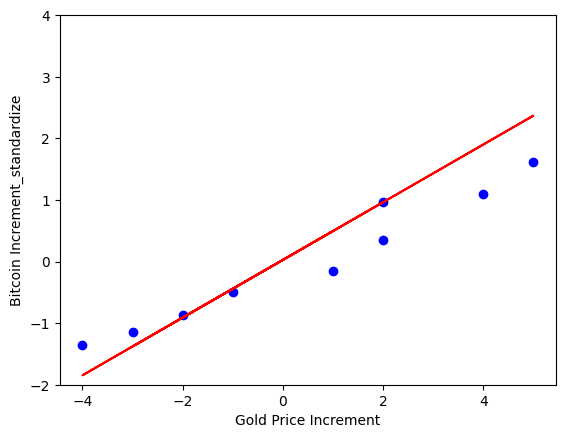

In [11]:
### START CODE HERE ###
def update(frame):
    h_after = theta_history[frame][1] * x + theta_history[frame][0]
    line.set_data(x, h_after)
    iteration_text.set_text(f'Iteration: {frame}, Loss: {loss_history[frame]:.4f}')

fig, ax = plt.subplots()
sc = ax.scatter(x, y, color='blue', label='Data')
line, = ax.plot(x, theta_history[0][1]*x + theta_history[0][0], color='red', label='Regression Line')

ax.set_xlabel('Gold Price Increment')
ax.set_ylabel('Bitcoin Increment_standardize')
ax.set_ylim(-2, 4)

iteration_text = ax.text(0.5, 1.05, '', transform=ax.transAxes, ha='center')
animation = FuncAnimation(fig, update, frames=N, interval=N, repeat=False)
plt.show()

animation.save('gradient_descent.gif', writer = 'ffmpeg', fps = 6)
### END CODE HERE ###

### Create the `Predicted_standardize` columns from the best parameters set

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize |
|----------------------|-------------------|-------------------------------|------------------------|
| -1                | 846                           | -0.493265              | -0.169845              |
| -4                | 424                           | -1.351452              | -1.063912              |
| 2                 | 1560                          | 0.958738               | 0.724223               |
| -3                | 523                           | -1.150124              | -0.765890              |



</details>

In [12]:
### START CODE HERE ###

df['Predicted_standardize'] = theta_history[-1][1]*df['Gold Price Increment'] + theta_history[-1][0]
df[['Gold Price Increment', 'Bitcoin Increment', 'Bitcoin Increment_standardize', 'Predicted_standardize']].head(4)
### END CODE HERE ###

,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize,Predicted_standardize
0,-1,846,-0.493265,-0.479001
1,-4,424,-1.351452,-1.475096
2,2,1560,0.958738,0.517093
3,-3,523,-1.150124,-1.143064


Create the `Predicted` that inverse standardize of `Predicted_standardize`


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize | Predicted       |
|----------------------|-------------------|-------------------------------|------------------------|-----------------|
| -1                | 846                           | -0.493265              | -0.239102	   | 970.981043| 1005.037081     |
| -4                | 424                           | -1.351452              | -1.148680	   | 523.710247     |
| 2                 | 1560                          | 0.958738               | 0.670476	       | 1418.251840     |
| -3                | 523                           | -1.150124              | -0.845487	   | 672.800513     |



</details>

In [13]:
### START CODE HERE ###
df['Predicted'] = df['Predicted_standardize']*df['Bitcoin Increment'].std() +df['Bitcoin Increment'].mean()

### END CODE HERE ###
df[['Gold Price Increment', 'Bitcoin Increment', 'Bitcoin Increment_standardize', 'Predicted_standardize','Predicted']].head(5)

,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize,Predicted_standardize,Predicted
0,-1,846,-0.493265,-0.479001,838.726168
1,-4,424,-1.351452,-1.475096,319.199979
2,2,1560,0.958738,0.517093,1358.252357
3,-3,523,-1.150124,-1.143064,492.375375
4,1,1012,-0.155685,0.185062,1185.076961


In [14]:
#MSE
mean_squared_error(df['Bitcoin Increment'],df['Predicted'])

10913.97477113589

## Question
1. What would be the iteration that gives the best parameters?
2. What are the best regression model parameters?
3. Show regression model equation of best parameters compared to the regression model equation from the last iteration (#30)

In [ ]:
# Ans
#1 20 - 30
#2 theta_0=-0.14696974709140975, theta_1=0.3320315585954268, iterations = 30 , alpha=0.01
#3 y_pred = 0.3320315585954268*x + -0.14696974709140975